# Random Forest Model

In [46]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

import pickle


In [47]:
# Import dataframe
df0 = pickle.load(open('../../Data/Processed/regression_data.p','rb'))
df0.head()

,customer_id,distance_from_store,gender,credit_score,customer_loyalty_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
0,74,3.38,F,0.59,0.263,2563.71,297,44,5,58.266136
1,524,4.76,F,0.52,0.298,2996.02,357,49,5,61.143265
2,607,4.45,F,0.49,0.337,2853.82,350,49,5,58.241224
3,343,0.91,M,0.54,0.873,2388.31,272,54,5,44.227963
4,322,3.02,F,0.63,0.350,2401.64,278,50,5,48.032800


In [48]:
# Remove non desired data from model (Non predictor data or ethics concern)
df1 = df0.drop(['customer_id','gender'], axis=1)

In [49]:
# Shuffle data
df2 = shuffle(df1, random_state=42)

In [50]:
# Deal with missing values
df2.isna().sum()

distance_from_store       2
credit_score              2
customer_loyalty_score    0
total_sales               0
total_items               0
transaction_count         0
product_area_count        0
average_basket_value      0
dtype: int64

In [51]:
# Low value count for missing data so we drop
df3 = df2.dropna()

In [52]:
df3.head()

,distance_from_store,credit_score,customer_loyalty_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
455,0.28,0.81,0.889,990.65,243,53,4,18.691509
621,2.58,0.58,0.162,333.26,70,13,4,25.635385
64,0.80,0.80,0.956,1753.96,371,52,5,33.730000
456,0.16,0.56,0.926,929.57,225,51,4,18.226863
196,3.27,0.67,0.297,1904.55,376,36,3,52.904167


In [53]:
# Split into input 'X' and output 'y'
X = df3.drop(['customer_loyalty_score'], axis = 1)
y = df3['customer_loyalty_score']

In [54]:
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
                                                    )

In [55]:
# Grid search
param_dict = {'n_estimators' : [10,50,100,500],
              'max_depth' : [1,2,3,4,5,6,7,8,9,10,None]
              }

grid_cv = GridSearchCV(estimator = RandomForestRegressor(random_state=42), # Instantiate the model
                       param_grid = param_dict, # dictionary of parameters to be tested
                       cv = 5, # Number of cross validations
                       scoring = 'r2', # Metric to be evaluated on
                       n_jobs = -1  # Uses all of computer's resources
                       )

In [56]:
# Fit grid search
grid_cv.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
                         'n_estimators': [10, 50, 100, 500]},
             scoring='r2')

In [57]:
# Return the best CV
grid_cv.best_score_

np.float64(0.9387449357248357)

In [58]:
# Return the best parameters
grid_cv.best_params_

{'max_depth': None, 'n_estimators': 100}

In [59]:
# model construction
regressor = grid_cv.best_estimator_

In [60]:
# fit model
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [61]:
# Assess accuracy and R2
y_pred = regressor.predict(X_test) # Create predictions for tests
r_squared = r2_score(y_test,y_pred) # Compare prediction results to actual result
r_squared

0.9533299052619874

In [62]:
# Cross - validation
cv = KFold(n_splits = 4, shuffle=True, random_state = 42)
cv_scores = cross_val_score(regressor, X_train, y_train, cv = cv, scoring='r2')
print(f'Cross-validation score : {round(cv_scores.mean(),2)}')

Cross-validation score : 0.92


In [63]:
# Calculate adjusted R2
num_data_points, num_input_vars = X_test.shape

adjusted_r_squared = 1 - (1 - r_squared) * (num_data_points - 1) / (num_data_points - num_input_vars - 1)
print(f'Adjusted R2 score : {round(adjusted_r_squared,2)}')

Adjusted R2 score : 0.95


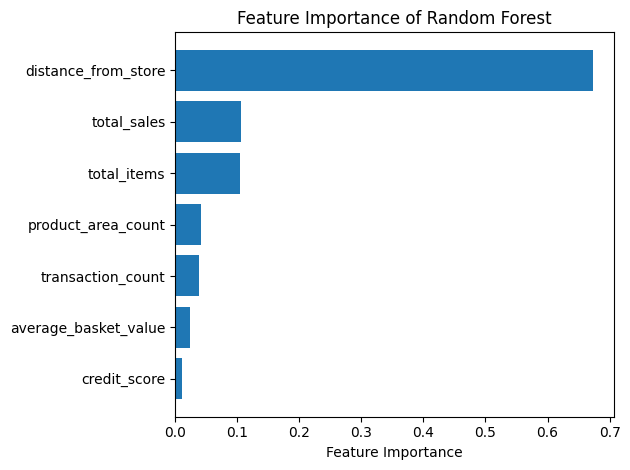

In [64]:
# Getting the feature importance metrics

feature_importance = pd.DataFrame(regressor.feature_importances_)
feature_names = pd.DataFrame(X.columns)
feature_importance_summary = pd.concat([feature_names,feature_importance],axis=1)
feature_importance_summary.columns = ['input_variable','feature_importance']
feature_importance_summary.sort_values(by='feature_importance',inplace=True)

plt.barh(feature_importance_summary['input_variable'],feature_importance_summary['feature_importance'])
plt.title('Feature Importance of Random Forest')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

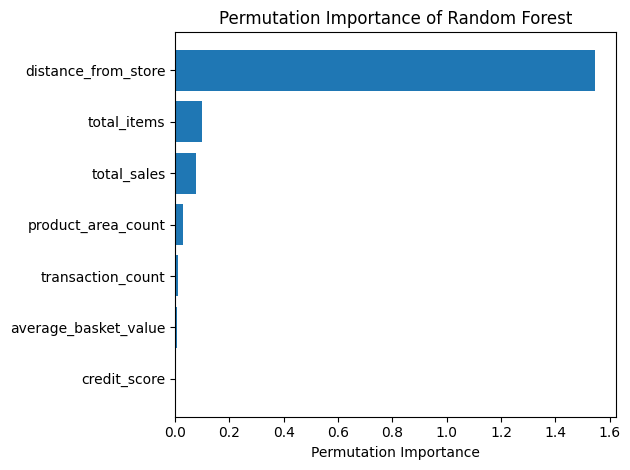

In [65]:
# Permutation Importance
result = permutation_importance(regressor, X_test, y_test, n_repeats = 10, random_state=42)

permutation_importance = pd.DataFrame(result['importances_mean'])
feature_names = pd.DataFrame(X.columns)
permutation_importance_summary = pd.concat([feature_names,permutation_importance],axis=1)
permutation_importance_summary.columns = ['input_variable','permutation_importance']
permutation_importance_summary.sort_values(by='permutation_importance',inplace=True)

plt.barh(permutation_importance_summary['input_variable'],permutation_importance_summary['permutation_importance'])
plt.title('Permutation Importance of Random Forest')
plt.xlabel('Permutation Importance')
plt.tight_layout()
plt.show()

The Random Forest model returns the best results out of the three regression models constructed

In [66]:
pickle.dump(regressor, open('../../Data/Processed/random_forest_regression_model.p','wb'))